In [2]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re


In [4]:
# 2. 데이터준비

df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")

In [9]:
# 2-1 데이터를 보기
print(df_train.info())
# survived 값이 y 값임
print("=======================================")
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [8]:
df_train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

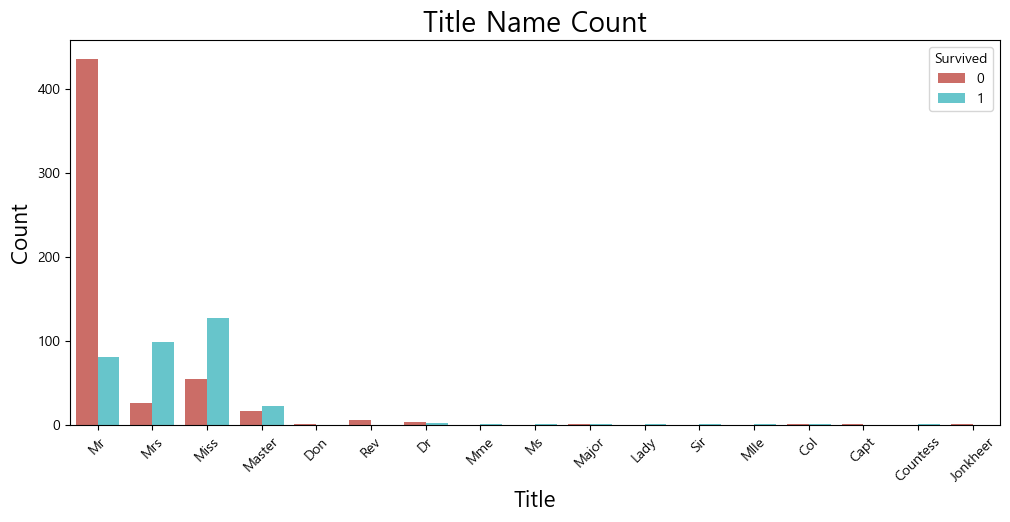

In [16]:
# 타이틀이라는 칼럼을 추가
# re 라이브러리를 이용해 Name 칼럼의 mr, mrs 같은 부분 만 추출합니다.
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

Chances to survive based on titles: 
Title
Master    0.575000
Miss      0.701087
Mr        0.156673
Mrs       0.795276
Name: Survived, dtype: float64


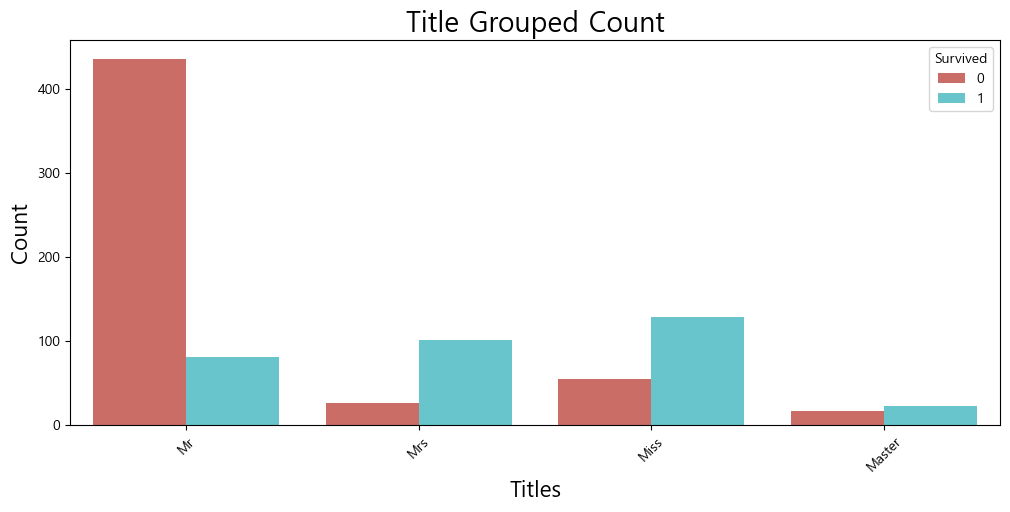

In [19]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
# Title 과 Survived 칼럼의 평균치
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#x 축은 mr ,ms... 칼럼이 있는 타이틀 이고 
#hue 옵션으로 survived 를 넣음
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

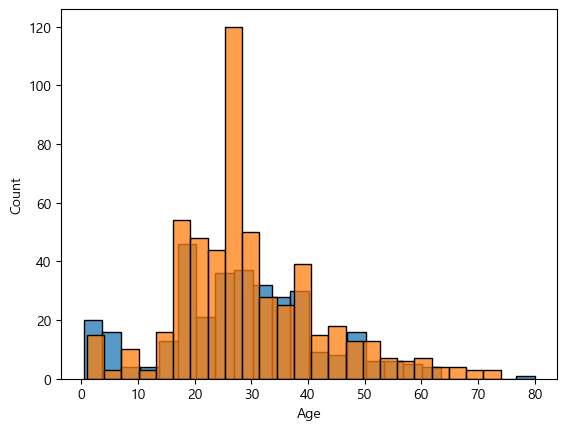

In [72]:
# 3 이제 결측치 NaN 값을 처리해야합니다.

age_high_zero_died = df_train[(df_train["Age"]>0)&
                              (df_train["Survived"]==0)]
age_high_zero_surv = df_train[(df_train["Age"]>0)&
                              (df_train["Survived"]==1)]

sns.histplot(age_high_zero_surv["Age"],bins=24)
sns.histplot(age_high_zero_died["Age"],bins=24)

plt.show()


In [65]:
# 널값이 있는 칼럼 조회
df_train.isnull().any()
# 여기서 Age,Cabin,Embarked,Title 은 널값이 존재하므로 
# 널값을 dropna 하거나 평균치,랜덤,중앙값 등으로 치환 이 필요합니다

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title           True
dtype: bool

In [51]:
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

# 여기서 median 은 중앙값 
# mean 은 평균값임
# 나이의 중앙값을 성별,타이틀,퍼스트클래스 별로 정렬 
print(age_group.median())


Sex     Pclass  Title 
female  1       Miss      30.0
                Mrs       40.0
        2       Miss      24.0
                Mrs       31.5
        3       Miss      18.0
                Mrs       31.0
male    1       Master     4.0
                Mr        40.0
        2       Master     1.0
                Mr        31.0
        3       Master     4.0
                Mr        26.0
Name: Age, dtype: float64


In [66]:
print(df_train.loc[df_train.Age.isnull(),"Age"])

# 널 값을 나이,성,타이틀별 중앙값으로 대체합니다.
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

print(df_train["Age"].isnull().sum())

766   NaN
Name: Age, dtype: float64
1


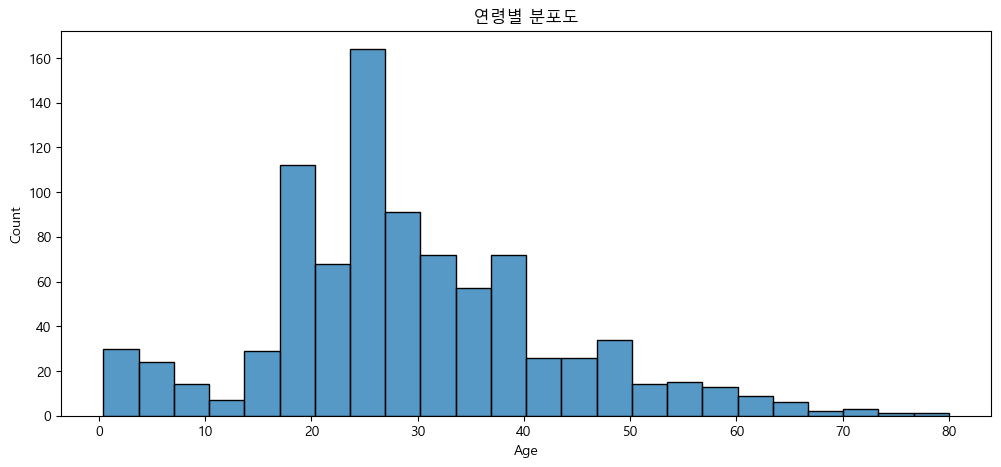

In [71]:
plt.figure(figsize=(12,5))

sns.histplot(df_train.Age,bins=24)
plt.title("연령별 분포도")
plt.xlabel("Age")
plt.show()